# Аналитика в авиакомпании

## Введение

**Целью данного исследования** является исследование предпочтений пользователей, покупающих билеты на те или иные направления. Исследование **построено на** предварительном анализе данных об авиаперевозках компании "F9" (российской авиакомпании, которая выполняет внутренние пассажирские авиаперевозки).

Иследование состоит из **следующих этапов**:

1. [Обзор данных и их предобработка](#step_1):
  * [Импорт библиотек](#step_1.1);
  * [Парсинг и работа с базой данных](#step_1.2);
  * [Общая информация о данных](#step_1.3);
  * [Обработка пропусков и дубликатов](#step_1.4);
  * [Вывод](#step_1.5).
2. [Исследовательский анализ данных](#step_2):
  * [Анализ распределения данных](#step_2.1)
  * [ТОП10 городов по количеству рейсов](#step_2.2);
  * [Связи основных показателей по авиаперевозкам](#step_2.3);
  * [Вывод](#step_2.4).
3. [Общий вывод](#step_3).

## Этап 1. Обзор данных и их предобработка <a id='step_1'></a>

### Импорт библиотек <a id='step_1.1'></a>

In [1]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

from google.colab import drive
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

### Парсинг и работа с базой данных <a id='step_1.2'></a>

Напишем парсер для сбора данных об 11 крупнейших фестивалях 2018 года с сайта с информацией о лучших фестивалях по версии Festival News (https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html).

In [2]:
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req_F9 = requests.get(URL)
soup_F9 = BeautifulSoup(req_F9.text, 'lxml')
# заголовки таблицы
fest_head = []
for row in soup_F9.find_all('th'):
    fest_head.append(row.text)
# наполнение таблицы
fest_content = []
for row in soup_F9.find_all('tr'):
    if not row.find_all('th'):
        fest_content.append([element.text for element in row.find_all('td')])

# Сохраним данные в датафрейм festivals
festivals = pd.DataFrame(fest_content, columns=fest_head)        
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


Также нами была изучена база данных об авиаперевозках, которая включает в себя:

1) Информацию об аэропортах:
 - трёхбуквенный код аэропорта;
 - название аэропорта;
 - город;
 - временную зону.

2) Информация о самолётах:
- код модели самолёта;
- модель самолёта;
- количество самолётов;

3) Информацию о билетах:
- уникальный номер билета;
- персональный идентификатор пассажира;
- имя и фамилию пассажира;

4) Информацию о рейсах:
- уникальный идентификатор рейса;
- аэропорт вылета;
- дату и время вылета;
- аэропорт прилёта;
- дату и время прилёта;
- id самолёта;

5) Информацию о фестивалях (получена парсингом данных):
- уникальный номер фестиваля;
- дату проведения фестиваля;
- город проведения фестиваля;
- название фестиваля.

**Результаты** анализа базы данных:

*Количество вылетов из каждого аэропорта вылета*. Результирующая таблица показала, что количество вылетов варьируется от 34 до 6376, то есть загруженность аэропортов значительно различается между собой.

*Количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года*. Оно также значительно отличается. Эти данные используются в данном исследовании для дальнейшего анализа.

*Количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре*. Поскольку существует несколько моделей самолётов Boeing и Airbus, было рассчитано суммарное количество рейсов по этим типам воздушных судов. Для Airbus оно составило 1567, а для Boeing - 1530.

*Среднее количество прибывающих рейсов в день для каждого города за август 2018 года*. Эти данные используются в данном исследовании для дальнейшего анализа.

*Фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили*. Было выявлено три таких фестиваля: Park Live в тридцатую неделю, Пикник Афиши в тридцать первую неделю и Видфест в тридцать шестую неделю.

*Количество купленных за каждую неделю с 23 июля по 30 сентября 2018 года билетов с номером недели, отметкой и названием о проходящем фестивале*. По результатам полученной таблицы мы предположили, что фестивали практически не влияют на спрос пассажиров.

Таким образом, предварительный анализ базы данных об авиаперевозках показал, что загруженность аэропортов сильно различается между собой. Количество рейсов на каждой модели самолёта также различно. Однако имеются модели, принадлежащие одному типу воздушного судна (Boeing и Airbus), которые при укрупнённом анализе следует рассматривать в совокупности. Также по результатам предварительного анализа можно предположить, что проведение фестивалей не влияет на спрос пассажиров.

### Общая информация о данных <a id='step_1.3'></a>

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Прочитаем файл models.csv и сохраним его в переменной model_flights
model_flights = pd.read_csv('/content/drive/My Drive/Colab Notebooks/models.csv')
model_flights.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
# изучим общую информацию о датафрейме model_flights
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Всего в таблице 8 строк и 2 столбца, тип данных у одного столбца - < object >, у второго столбца - целочисленный.

Подробно разберём, какие в model_flights столбцы, и какую информацию они содержат:

- model — модели самолета;
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

Отметим, что пропусков в данных нет; замена типа данных также не требуется.

In [6]:
# изучим информацию о значениях датафрейма model_flights
model_flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


В данных очень большой разброс: от 300 до 4557 рейсов. Такой разброс может быть связан с тем, что некоторые модели относятся к одному типу воздушного судна (Boeing и Airbus). Соответственно, при укрупнённом анализе (если бы мы сравнивали количество полётов для самолётов разного производства, но вне зависимости от марки), разброс не был бы таким большим.

In [7]:
# Прочитаем файл avg_flights.csv и сохраним его в переменной city_flights.
city_flights = pd.read_csv('/content/drive/My Drive/Colab Notebooks/avg_flights.csv')
city_flights.sample(10)

,city,average_flights
33,Красноярск,11.580645
60,Оренбург,5.000000
35,Курск,2.290323
45,Надым,2.290323
64,Петрозаводск,5.870968
78,Сыктывкар,4.129032
19,Грозный,1.129032
96,Чита,1.580645
42,Мирный,6.290323
15,Воркута,4.580645


In [8]:
# изучим общую информацию о датафрейме city_flights
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Всего в таблице 101 строка и 2 столбца, тип данных у одного столбца - < object >, у второго столбца - численные с плавающей точкой.

Подробно разберём, какие в city_flights столбцы, и какую информацию они содержат:

- city — город;
- average_flights — среднее количество рейсов, прибывающих в город за день в августе 2018 года.

Отметим, что пропусков в данных нет; замена типа данных также не требуется. С одной стороны, количество рейсов за день должно быть целочисленным, но с другой стороны, данный показатель - это усреднённая мера, позволяющая сравнивать различные города между собой. Соответственно, на наш взгляд, приведение числа с плавающей точкой к целочисленному значению может повлечь за собой потерю важной информации (например, приравняет города со средним количеством рейсов 2,16 в день и 2 рейса в день), что недопустимо.

In [9]:
# изучим информацию о значениях датафрейма city_flights
city_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


В данных очень большой разброс: от 1 до 130 рейсов в день. Такой разброс может быть связан с ошибками; но скорее всего, максимальное значение характерно для города, являеющегося хабом; то есть города, в котором сосредоточено очень большое число стыковочных рейсов в другие города.

In [10]:
# Изучим уникальные значения, которые принимает столбец 'average_flights'
city_flights['average_flights'].sort_values().unique()

array([  1.        ,   1.12903226,   1.27777778,   1.29411765,
         1.32258065,   1.35714286,   1.38709677,   1.5483871 ,
         1.58064516,   1.59090909,   1.60869565,   2.        ,
         2.03225806,   2.16129032,   2.29032258,   2.4516129 ,
         2.58064516,   2.59090909,   2.61290323,   2.74193548,
         2.87096774,   3.        ,   3.12903226,   3.16129032,
         3.29032258,   3.41935484,   3.74193548,   3.87096774,
         3.90322581,   4.        ,   4.12903226,   4.19354839,
         4.29032258,   4.58064516,   4.87096774,   5.        ,
         5.12903226,   5.35483871,   5.87096774,   6.        ,
         6.03225806,   6.29032258,   6.5483871 ,   6.70967742,
         6.96774194,   7.74193548,   8.29032258,   8.41935484,
         8.74193548,   9.        ,   9.58064516,   9.61290323,
        10.        ,  10.12903226,  10.19354839,  11.32258065,
        11.58064516,  17.32258065,  31.16129032, 129.77419355])

Список уникальных значений столбца 'average_flights' показывает, что у нас действительно имеется только одно значение окло 130 рейсов в день; а также подтверждает нецелесообразность изменения типа данных на целочисленный, в связи с большим количеством значений, которые отличаются на уровне второго значка после запятой. Однако по той же причине (отличие данных на уровне второго значка после запятой) рациональным выглядит решение округлить данные до "сотых", отбросив ненужные значения; что улучшит вид данных, но не повлияет на исследование.

### Обработка пропусков и дубликатов <a id='step_1.4'></a>

На этапе изучения общей информации мы обосновали отсутствие необходимости в замене типа данных. Однако, также было отмечено, что поскольку в датафрейме city_flights данные о среднем количестве рейсов отличаются на уровне второго значка после запятой, необходимо округлить их до "сотых"; что улучшит вид данных, но не повлияет на исследование.

In [11]:
city_flights['average_flights'] = round(city_flights['average_flights'], 2)
city_flights.sample(10)

,city,average_flights
22,Ижевск,1.00
91,Хабаровск,6.55
30,Когалым,3.16
15,Воркута,4.58
98,Южно-Сахалинск,4.29
17,Геленджик,2.59
31,Комсомольск-на-Амуре,1.00
75,Ставрополь,2.00
88,Усть-Кут,1.00
61,Орск,1.59


Проверим отсутствие пропусков в данных.

In [12]:
model_flights.isna().sum()

model             0
flights_amount    0
dtype: int64

In [13]:
city_flights.isna().sum()

city               0
average_flights    0
dtype: int64

Проверим отсутствие дубликатов в данных.

In [14]:
city_flights['city'].duplicated().sum()

0

### Вывод <a id='step_1.5'></a>

У нас имеется две исходные таблицы с данными о количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года и данными о среднем количестве прибывающих рейсов в день для каждого города за август 2018 года. Оба датафрейма не имеют пропусков и не требуют изменения типов данных.

В данных о количестве рейсов по моделям самолётов очень большой разброс: от 300 до 4557 рейсов. Такой разброс может быть связан с тем, что некоторые модели относятся к одному типу воздушного судна (Boeing и Airbus). Соответственно, при укрупнённом анализе (если бы мы сравнивали количество полётов для самолётов разного производства, но вне зависимости от марки), разброс не был бы таким большим.

В данных о количестве рейсов по городам также имеется очень большой разброс: от 1 до 130 рейсов в день. Такой разброс связан с тем, что максимальное значение характерно для города, являеющегося хабом (города, в котором сосредоточено очень большое число стыковочных рейсов в другие города).

На этапе подготовки данных было округлено до "сотых" среднее число рейсов по городам. Также было проверено отсутствие пропусков и дубликатов в данных.

## Этап 2. Исследовательский анализ данных <a id='step_2'></a>

### Анализ распределения данных <a id='step_2.1'></a>

In [15]:
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


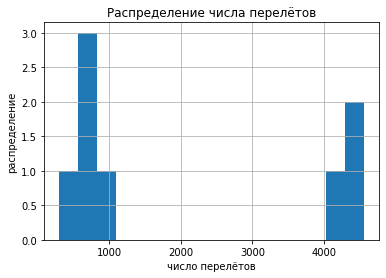

In [16]:
model_flights.hist(bins=16)
plt.title('Распределение числа перелётов')
plt.xlabel('число перелётов')
plt.ylabel('распределение')
plt.show()

Вид распределения, отличный от нормального и пуассоновского может быть связан с тем, что мы имеем сводную таблицу с данными о моделях и полётах, которая является очень маленькой выборкой.

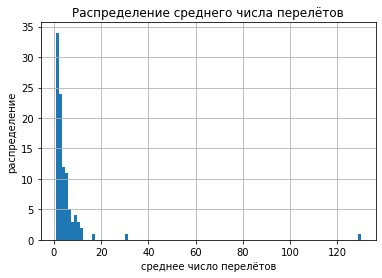

In [17]:
city_flights.hist(bins=101)
plt.title('Распределение среднего числа перелётов')
plt.xlabel('среднее число перелётов')
plt.ylabel('распределение')
plt.show()

Распределение похоже на пуассоновское с длинным хвостом из разрозненных значений, которые, как указывалось выше, могут быть связаны с характеристиками аэропортов отдельных городов (Москва, Санкт-Петербург). "Отсечём" хвост и ещё раз посмотрим на распределение.

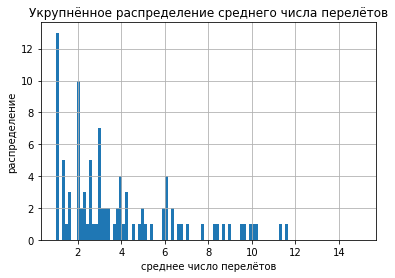

In [18]:
city_flights.hist(bins=101, range=(1,15))
plt.title('Укрупнённое распределение среднего числа перелётов')
plt.xlabel('среднее число перелётов')
plt.ylabel('распределение')
plt.show()

Видим, что в большинстве городов среднее значение рейсов в день отличается незначительно: от 1 до 3. Есть также значительная часть с количеством рейсов от 4 до 6. И несколько городов, в которых среднее число рейсов в день выше.

Такие города и попадут в ТОП-10 городов по количеству рейсов. Рассмотрим их далее.

### Определение топ-10 городов по количеству рейсов <a id='step_2.2'></a>

In [19]:
TOP_city_flights = city_flights.sort_values(by='average_flights', ascending=False).reset_index(drop=True).head(10)
TOP_city_flights

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


На первом месте по среднему количеству рейсов в день находится Москва. Действительно, Москва имеет несколько аэропортов, каждый из которых является хабом для различных авиакомпаний, принимая не только внутренние, но и международные рейсы. Для данной авиакомпании, скорее всего, существует большое число стыковочных рейсов между городами, проходящих через Москву. Санкт-Петербург занимает второе место; аэропорт в этом городе также служит хабом, но, скорее всего, стыковочных рейсов в нём меньше, чем в Москве. На третьем месте находится Новосибирск. Далее идёт Красноярск и Екатеринбург. После них - Ростов-на-Дону, Пермь и Брянск. И закрывают ТОП-10 Сочи и Ульяновск.

### Построение графиков связей данных <a id='step_2.3'></a>

#### Модели самолетов и количество рейсов

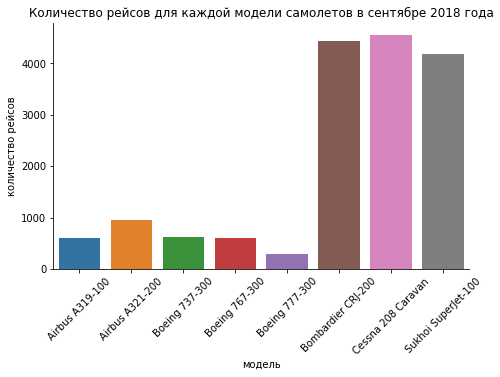

In [20]:
plot = sns.catplot("model", "flights_amount", kind="bar", data=model_flights)
plt.title("Количество рейсов для каждой модели самолетов в сентябре 2018 года")
plt.xlabel('модель')
plt.ylabel('количество рейсов')
plot.set_xticklabels(rotation=45)
plot.fig.set_size_inches(8,4)
plt.show()

Как было отмечено ранее, у самолетов Airbus и Boeing представлено несколько моделей в данной авиакомпании в анализируемый период. Количество рейсов на Airbus A319-100, Boeing 737-300 и Boeing 767-300	практически одинаково (около 600 рейсов). В два раза меньше рейсов на самолётах модели Boeing 777-300 (300 рейсов); 960 рейсов на Airbus A321-200. И в несколько раз большее количество рейсов в самолётах моделей Sukhoi SuperJet-100 (4185 рейсов), а также Bombardier CRJ-200 и Cessna 208 Caravan (4446  рейсов и 4557 рейсов, соответственно).

Однако, сами по себе данные о рейсах ничего не говорят нам о спросе. У нас нет информации об их заполняемости. Очевидно, что по техническим характеристикам, есть максимальная заполняемость рейсов, исходя из модели воздушного судна. Она может отличаться от спецификации модели, но есть некие средние значения, которые отличается незначительно в рамках одной модели. Логично предположить, что авиакомпания будет "ставить" рейсов больше на тех моделях самолётов, которые максимально заполняются, чтобы не нести лишние затраты, отправляя полупустые воздушные судна.

В связи с этим, для более полного анализа нам понадобятся данные о технических характеристиках, а именно: заполняемости представленных моделей самолётов.

Мы составили словарь model_maxpas_dic, в котором представлено максимальное количество пассажиров на каждой из моделей воздушного судна по техническим характеристикам. Данные по моделям взяты из открытых источников на сайтах аналогичных анализируемой авиакомпаний: https://www.s7.ru/ru/about/ourfleet.dot, https://www.aeroflot.ru/us-ru/about/plane_park, https://www.utair.ru/about/aircrafts/plane/; а также на сайте о характеристиках пассажирских самолётов: https://www.airlines-inform.ru/commercial-aircraft/.

In [21]:
model_maxpas_content = [['Airbus A319-100', 144], ['Airbus A321-200', 198], ['Boeing 737-300', 148], ['Boeing 767-300', 249], 
                ['Boeing 777-300', 402], ['Bombardier CRJ-200', 50], ['Cessna 208 Caravan', 10], ['Sukhoi SuperJet-100', 87]]
model_maxpas_dic = pd.DataFrame(model_maxpas_content, columns=['model', 'maxpas'])
model_maxpas_dic

,model,maxpas
0,Airbus A319-100,144
1,Airbus A321-200,198
2,Boeing 737-300,148
3,Boeing 767-300,249
4,Boeing 777-300,402
5,Bombardier CRJ-200,50
6,Cessna 208 Caravan,10
7,Sukhoi SuperJet-100,87


Видим значительные различия в максимальной заполняемости рейсов. У нас нет данных о фактической заполняемости, однако опираясь на предположение о рациональном (с точки зрения затрат) планировании закупок самолётов авиакомпанией и их распределении по направлениям, можем предположить также, что фактическая заполняемость рейсов по моделям отличается пропорционально их максимально возможной заполняемости.

Добавим столбец с данной характеристикой в наш исходный датафрейм и вычислим коэффициент корреляции между максимальной загрузкой и количеством рейсов.

In [22]:
model_flights['maxpas'] = model_maxpas_dic['maxpas']
model_flights

,model,flights_amount,maxpas
0,Airbus A319-100,607,144
1,Airbus A321-200,960,198
2,Boeing 737-300,630,148
3,Boeing 767-300,600,249
4,Boeing 777-300,300,402
5,Bombardier CRJ-200,4446,50
6,Cessna 208 Caravan,4557,10
7,Sukhoi SuperJet-100,4185,87


In [23]:
model_flights.corr()

,flights_amount,maxpas
flights_amount,1.000000,-0.788684
maxpas,-0.788684,1.000000


Наблюдается очень тесная обратная связь между количеством рейсов и максимальной загрузкой по типам воздушного судна: чем больше максимально возможное количество пассажиров, тем меньшее количество рейсов. Возможно, в конечном счёте спрос на перелёты равномерно распределён между рейсами по моделям самолёта. И авиакомпания ставит крупные рейсы реже, а небольшие рейсы чаще, в среднем имея за месяц равное количество пассажиров на всех направлениях по моделям самолётов. Проверим это, рассчитав количество пассажиров на каждой модели воздушного судна с предпосылкой о максимальной загрузке каждого рейса (выше мы уже указывали на то, что загрузка врядли будет максимальной, но скорее всего, соотношение между разными рейсами по моделям сохранится).

In [24]:
model_flights['passeng'] = model_flights['flights_amount'] * model_flights['maxpas']
model_flights.sort_values(by='passeng', ascending=False).reset_index(drop=True)

,model,flights_amount,maxpas,passeng
0,Sukhoi SuperJet-100,4185,87,364095
1,Bombardier CRJ-200,4446,50,222300
2,Airbus A321-200,960,198,190080
3,Boeing 767-300,600,249,149400
4,Boeing 777-300,300,402,120600
5,Boeing 737-300,630,148,93240
6,Airbus A319-100,607,144,87408
7,Cessna 208 Caravan,4557,10,45570


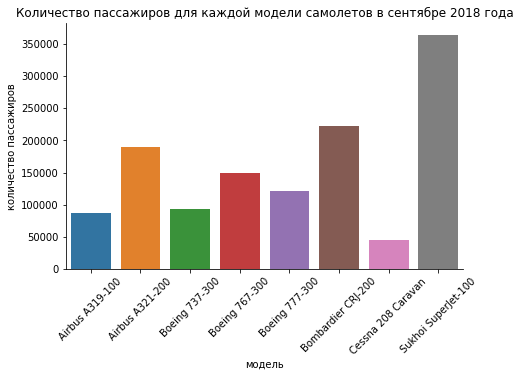

In [25]:
plot = sns.catplot("model", "passeng", kind="bar", data=model_flights)
plt.title("Количество пассажиров для каждой модели самолетов в сентябре 2018 года")
plt.xlabel('модель')
plt.ylabel('количество пассажиров')
plot.set_xticklabels(rotation=45)
plot.fig.set_size_inches(8,4)
plt.show()

После всех преобразований данных наблюдаем немного иную картину, чем по количеству рейсов: наибольшее число пассажиров было отправлено самолётами модели Sukhoi SuperJet-100 (вместимость 87); на втором месте - Bombardier CRJ-200 (вместимость 50); на третьем месте - Airbus A321-200 (вместимость 198). Четвёртое, пятое и шестое место занимают самолёты Boeing, из них самая вместительная модель самолёта (Boeing 777-300 с загрузкой в 402 места) занимает пятое место. Немного отстаёт Airbus A319-100. И на последнем месте самый маленький самолёт Cessna 208 Caravan с вместимостью 10 мест.

Таким образом, количество пассажиров действительно разниться по моделям. Но на наш взгляд, это не связано со спросом (в большинстве случаев пассажиры не выбирают билеты по типу воздушного судна), а скорее, связано с эффективностью распределения воздушных судов между н популярными и непопулярными направлениями компанией. Однако и здесь не следует забывать, что помимо максимальной загрузки у самолётов есть другие характеристики (например, максимально возможная дальность полёта), которые также оказывают влияние на логистику.

Единственное, что мы можем сказать по полученным графикам, авиакомпания в большей степени использует самолёты модели Sukhoi SuperJet-100 с не очень высокой возможностью загрузки, но частота таких рейсов очень велика.

#### Города и количество рейсов

Найдём в открытых источниках данных информацию о местоположении городов на карте (широту и долготу) и численности населения: https://gist.github.com/dnovik/694d106be3ff20eb0c73a0511c83b7f3

In [26]:
# Прочитаем файл cities.csv и сохраним его в переменной city_coord
city_info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cities.csv')
city_coord = city_info[['Город', 'Широта', 'Долгота', 'Население']]
city_coord.columns = ['city', 'latitude', 'longitude', 'population']
city_coord.head()

,city,latitude,longitude,population
0,Адыгейск,44.878372,39.190172,12689
1,Майкоп,44.609827,40.100653,144055
2,Горно-Алтайск,51.958268,85.960296,62861
3,Алейск,52.492091,82.779415,28528
4,Барнаул,53.348115,83.779836,635585


Присоединим таблицу, добавив данные с координатами местоположения в исходный датафрейм с городами.

In [27]:
city_flights = city_flights.merge(city_coord, on=['city'], how='left')
city_flights['city'] = city_flights['city'].drop_duplicates()
city_flights = city_flights.loc[city_flights['city'].isnull()==False].reset_index(drop=True)
city_flights.sample(10)

,city,average_flights,latitude,longitude,population
11,Бугульма,3.00,54.536343,52.789529,89144
38,Магадан,1.36,59.568176,150.808529,95925
63,Пермь,10.13,58.010321,56.234178,1000679
5,Барнаул,2.61,53.348115,83.779836,635585
87,Усть-Илимск,2.87,57.943132,102.741468,86591
29,Киров,6.00,54.079082,34.307751,31888
72,Саратов,4.00,51.530376,45.953026,836900
48,Нерюнгри,2.58,56.660032,124.720310,61746
54,Новосибирск,17.32,55.028102,82.921057,1498921
35,Курск,2.29,51.730339,36.192645,414595


Проверим, что для всех городов исходного датафрейма нашлось соответствие координат в вспомогательной таблице.

In [28]:
city_flights.loc[city_flights['latitude'].isnull()==True]

,city,average_flights,latitude,longitude,population
43,Москва,129.77,NaN,NaN,NaN
70,Санкт-Петербург,31.16,NaN,NaN,NaN


У нас не попали данные по Москве и Санкт-Петербургу. Это связано с тем, что в вспомогательной таблице Москва и Санкт-Петербург указаны не в столбце Город, который мы использовали, а в столбце Регион. Найдём данные по ним, и добавим их в анализируемый датафрейм.

In [29]:
# Функция для заполнения пропусков
def fillnan(city, param_1, param_2):
  city_flights.loc[city_flights['city'] == city, param_1] = (
      city_flights.loc[city_flights['city'] == city, param_1]
      .fillna((city_info.loc[city_info['Регион'] == city, param_2].sum())))

In [30]:
fillnan('Москва', 'latitude', 'Широта')
fillnan('Санкт-Петербург', 'latitude', 'Широта')
fillnan('Москва', 'longitude', 'Долгота')
fillnan('Санкт-Петербург', 'longitude', 'Долгота')
fillnan('Москва', 'population', 'Население')
fillnan('Санкт-Петербург', 'population', 'Население')

In [31]:
city_flights.isnull().sum()

city               0
average_flights    0
latitude           0
longitude          0
population         0
dtype: int64

In [32]:
city_flights['population'] = city_flights['population'].astype('int')

Все пропуски заполнены. Теперь мы можем посчитать коэффициент корреляции между численностью населения и средним количеством рейсов; и построить график, который отобразит количество рейсов в среднем за день по городам.

In [33]:
city_flights.corr()

,average_flights,latitude,longitude,population
average_flights,1.000000,0.012707,-0.145252,0.953812
latitude,0.012707,1.000000,0.100372,-0.051753
longitude,-0.145252,0.100372,1.000000,-0.172317
population,0.953812,-0.051753,-0.172317,1.000000


Между численностью населения в городе и средним дневным количеством рейсов существует очень тесная связь, близкая к единице. Соответственно, чем выше численность, тем больше в среднем количество рейсов в городе.

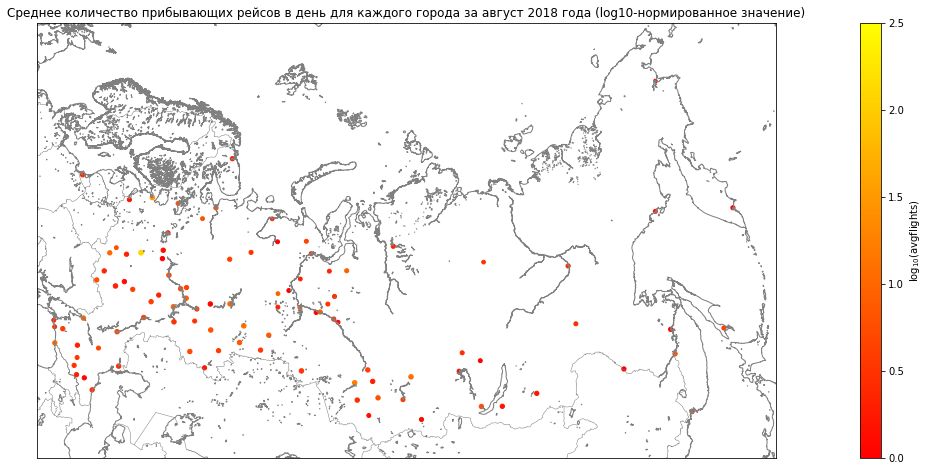

In [34]:
# Извлекаем интересующие нас данные
lat = city_flights['latitude'].values
lon = city_flights['longitude'].values
avgflights = city_flights['average_flights'].values
population = city_flights['population'].values

# рисуем фон карты
fig = plt.figure(figsize=(30, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=70, lon_0=92,
            width=8500000, height=5000000)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
plt.title("Среднее количество прибывающих рейсов в день для каждого города за август 2018 года (log10-нормированное значение)")

# наносим данные по городам, отражая количество рейсов разными цветами, а численность населения – разными размерами точек
m.scatter(lon, lat, latlon=True, 
          c=np.log10(avgflights), 
          s=np.log2(population), 
          cmap='autumn', alpha=1)

# создаем шкалу цветов
plt.colorbar(label=r'$\log_{10}({\rm avgflights})$')
plt.clim(0, 2.5)

Наблюдаем очень близкие значения в регионах. Явной закономерности не наблюдается. Кроме того, площадь точек на графике - это нормированные значения по численности населения; и они также близки в разных городах.
На наш взгляд, для большей наглядности данного графика следует создать дополнительный столбец, в котором будет представлено количество рейсов, приходящееся на 1000 человек, живущих в городе (соотношение среднего количества рейсов к численности населения, умноженное на 1000).

In [35]:
city_flights['avgflight_to_pop'] = city_flights['average_flights'] / city_flights['population'] * 1000
city_flights['avgflight_to_pop'].describe()

count    101.000000
mean       0.028335
std        0.050761
min        0.001592
25%        0.005921
50%        0.011270
75%        0.024331
max        0.340471
Name: avgflight_to_pop, dtype: float64

Построим аналогичный предшествующему график, но по новому столбцу (количеству рейсов на 1000 человек населения города).

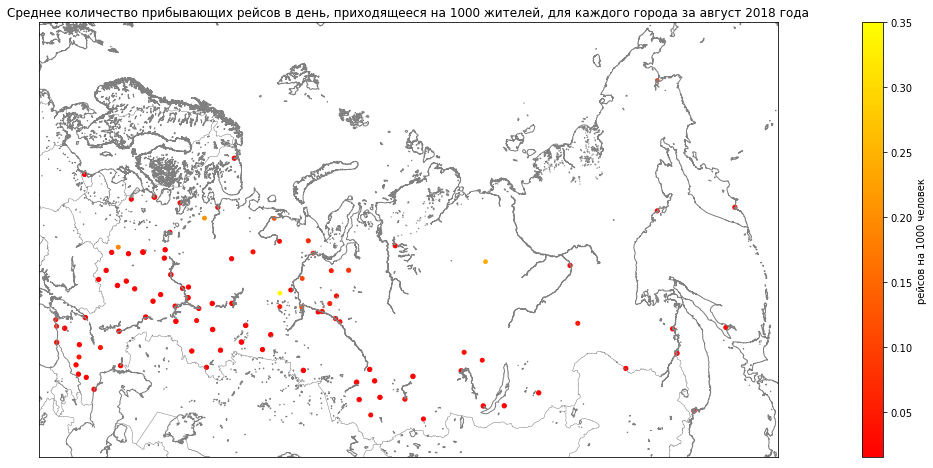

In [36]:
# Извлекаем интересующие нас данные
lat = city_flights['latitude'].values
lon = city_flights['longitude'].values
avgflights_to_population = city_flights['avgflight_to_pop'].values
population = city_flights['population'].values

# рисуем фон карты
fig = plt.figure(figsize=(30, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=70, lon_0=92,
            width=8500000, height=5000000)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
plt.title("Среднее количество прибывающих рейсов в день, приходящееся на 1000 жителей, для каждого города за август 2018 года")

# наносим данные по городам, отражая количество рейсов разными цветами, а численность населения – разными размерами точек
m.scatter(lon, lat, latlon=True, 
          c=avgflights_to_population, 
          s=np.log2(population), 
          cmap='autumn', alpha=1)

# создаем шкалу цветов
plt.colorbar(label=r'рейсов на 1000 человек')
plt.clim(0.015, 0.35)

Наблюдаем несколько иную картину: города, которые не лидировали по абсолютному значению рейсов в день, стали лидерами по количеству рейсов на 1000 жителей.

#### Топ-10 городов и количество рейсов

Как было выявлено в предыдущем пункте, составленный нами топ-10 по количеству рейсов (во главе которого находятся Москва и Санкт-Петербург), не являются лидерами, если мы проводим анализ не по абсолютному показателю, а по количеству рейсов, приходящемуся на 1000 жителей. Корреляция показала, что эти показатели тесно связаны между собой, соответственно, рациональным выглядит и анализ рейсов как в отдельности, так и в совокупности с количеством жителей.  Представим новый ТОП-10 в виде таблицы.

In [37]:
TOP_city_flights_onpop = city_flights.sort_values(by='avgflight_to_pop', ascending=False).reset_index(drop=True).head(10)
TOP_city_flights_onpop

,city,average_flights,latitude,longitude,population,avgflight_to_pop
0,Советский,9.00,61.370669,63.566863,26434,0.340471
1,Удачный,3.00,66.407237,112.306165,12611,0.237888
2,Мирный,6.29,62.764427,40.335998,30259,0.207872
3,Киров,6.00,54.079082,34.307751,31888,0.188159
4,Нарьян-Мар,2.61,67.638153,53.006934,21296,0.122558
5,Ханты-Мансийск,8.42,61.002434,69.018332,79410,0.106032
6,Белоярский,2.00,63.712181,66.677236,20283,0.098605
7,Новый Уренгой,8.29,66.084004,76.681003,104144,0.079601
8,Анадырь,1.00,64.731435,177.501575,13053,0.076611
9,Воркута,4.58,67.497348,64.061104,70551,0.064918


В новом списке ТОП-10 по количеству рейсов в день, приходящемуся на 1000 населения, наблюдаются иные лидеры, чем в изначальном списке ТОП-10 по абсолютному значению количества рейсов. В данном списке лидируют такие города как Советский, Удачный, Мирный, Киров, Нарьян-Мар, Ханты-Мансийск, Белоярский, Новый Уренгой, Анадырь и Воркута.

Построим графики, иллюстрирующие количество рейсов для обоих полученных нами списков ТОП-10.

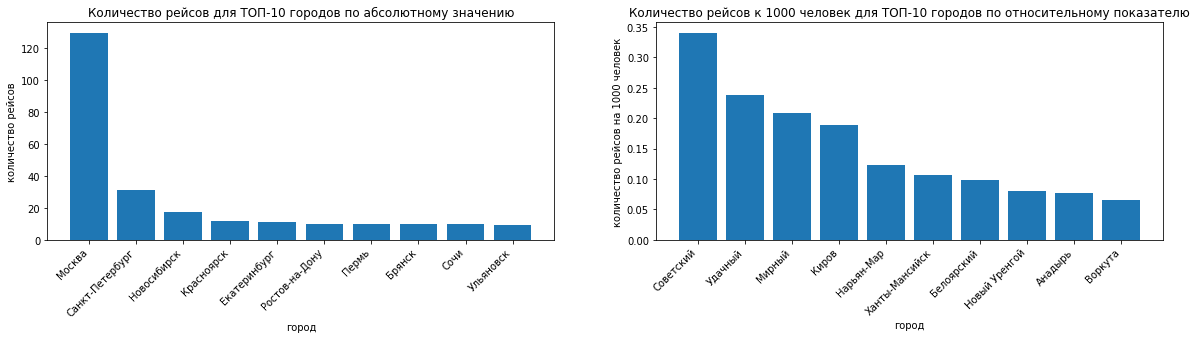

In [38]:
fig = plt.figure(figsize=(20,4))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.set(title = 'Количество рейсов для ТОП-10 городов по абсолютному значению',
         xlabel='город',
         ylabel='количество рейсов')
ax_2.set(title = 'Количество рейсов к 1000 человек для ТОП-10 городов по относительному показателю',
         xlabel='город',
         ylabel='количество рейсов на 1000 человек')

ax_1.bar(TOP_city_flights['city'], TOP_city_flights['average_flights'])
ax_2.bar(TOP_city_flights_onpop['city'], TOP_city_flights_onpop['avgflight_to_pop'])

ax_1.set_xticklabels(TOP_city_flights['city'], rotation = 45, ha="right")
ax_2.set_xticklabels(TOP_city_flights_onpop['city'], rotation = 45, ha="right")

plt.show()

Различия в ТОП-10 рейсов на 1000 человек не столь значительны, как различия в абсолютных показателях. Однако, на наш взгляд, если мы анализируем спрос, нам важен именно показатель соотношения количества рейсов к численности населения, поскольку для большего числа населения и спрос будет выше в абсолютном значении. Компания, учитывает это, ставя больше рейсов в крупные города (об этом говорит и показатель корреляции).

Рассмотрим города, в которых показатель количества рейсов на 1000 человек самый низкий.

In [39]:
city_flights.sort_values(by='avgflight_to_pop', ascending=True).reset_index(drop=True).head(10)

,city,average_flights,latitude,longitude,population,avgflight_to_pop
0,Ижевск,1.00,56.852744,53.211396,628117,0.001592
1,Ярославль,1.32,57.621614,39.897878,591486,0.002232
2,Воронеж,2.00,51.659238,39.196828,889680,0.002248
3,Иваново,1.00,56.999468,40.972823,409277,0.002443
4,Липецк,1.29,52.610303,39.594627,508124,0.002539
5,Самара,3.00,53.195166,50.106769,1164900,0.002575
6,Омск,3.29,54.984814,73.367464,1154000,0.002851
7,Улан-Удэ,1.61,51.833438,107.584151,431922,0.003728
8,Кемерово,2.00,55.390972,86.046786,532884,0.003753
9,Комсомольск-на-Амуре,1.00,50.550011,137.007929,263906,0.003789


В Ижевске, Ярославле, Воронеже, Иваново, Липецке, Самаре, Омске, Улан-Удэ, Кемерово и Комсомольске-на-Амуре количество рейсов, приходящихся на 1000 населения самое низкое. На наш взгляд, это может быть связано с недостаточностью рейсов в данные города (количество населения предполагает потребность в большем числе рейсов). Однако, это может быть связано и сдругими причинами. Например, сложностями в предоставлении большего числа рейсов по данному направлению; либо небольшое число рейсов компенсируется моделями самолётов, имеющими большую максимальную загрузку; либо покупательная способность населения в данных городах не соответствует ценовой политике авиакомпании и ценам на авиабилеты. Однако для выяснения реальной причины требуется дополнительное исследование с уточнением условий и дополнительными данными от авиаперевозчика (например, ценами билетов по направлениям).

### Вывод <a id='step_2.4'></a>

Были выделены списки ТОП-10 городов по количеству рейсов. В первом списке лидерами являются федеральные города: Москва и Санкт-Петербург. Это может быть связано с тем, что аэропорта в них являются международными хабами, в которых происходит большое число "стыковок" рейсов в другие города и зарубеж. Также в лидерах находятся такие города как Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск. Это достаточно крупные города с немаленькой покупательной способностью населения. Возможно, это и обуславливает большое число прилетающих рейсов, ориентированных на спрос.

Однако, поскольку численность населения в городах различна, нами было принято решение проанализировать её влияние на количество рейсов. Коэффициент корреляции показал очень тесную взаимосвязь. Также было принято решение построить второй список ТОП-10 по количеству рейсов, приходящихся на 1000 человек населения ("обеспеченность" населения рейсами). В полученном списке наблюдаются иные лидеры, чем в изначальном списке ТОП-10 по абсолютному значению количества рейсов: Советский, Удачный, Мирный, Киров, Нарьян-Мар, Ханты-Мансийск, Белоярский, Новый Уренгой, Анадырь и Воркута. При этом различия в ТОП-10 рейсов на 1000 человек не столь значительны, как различия в абсолютных показателях. 

Продолжая анализ по данному показателю, мы определили города, которые в меньшей мере "обеспечены" рейсами на 1000 человек: Ижевск, Ярославль, Воронеж, Иваново, Липецк, Самара, Омск, Улан-Удэ, Кемерово и Комсомольск-на-Амуре. Это может быть связано с недостаточностью рейсов в данные города (количество населения предполагает потребность в большем числе рейсов). Однако, это может быть связано и с другими причинами. Например, сложностями в предоставлении большего числа рейсов по данному направлению; либо небольшое число рейсов компенсируется моделями самолётов, имеющими большую максимальную загрузку; либо покупательная способность населения в данных городах не соответствует ценовой политике авиакомпании и ценам на авиабилеты; либо спрос на авиабилеты по этим направлениям действительно низок (часть городов является промышленными, часть - расположена недалеко от Москвы, из которой можно добраться в города другим видом транспорта; часть не имеет никаких общеизвестных достопримечательностей). Однако для выяснения реальной причины требуется дополнительное исследование с уточнением условий и дополнительными данными от авиаперевозчика (например, ценами билетов по направлениям).

Также был проведён анализ связи между моделями воздушного судна и количеством рейсов. Количество рейсов на Airbus A319-100, Boeing 737-300 и Boeing 767-300 практически одинаково (около 600 рейсов). В два раза меньше рейсов на самолётах модели Boeing 777-300 (300 рейсов); 960 рейсов на Airbus A321-200. И в несколько раз большее количество рейсов в самолётах моделей Sukhoi SuperJet-100 (4185 рейсов), а также Bombardier CRJ-200 и Cessna 208 Caravan (4446 рейсов и 4557 рейсов, соответственно). Однако, сами по себе данные о рейсах ничего не говорят нам о спросе. По техническим характеристикам, есть максимальная заполняемость рейсов, исходя из модели воздушного судна. Логично предположить, что авиакомпания будет "ставить" рейсов больше на тех моделях самолётов, которые максимально заполняются, чтобы не нести лишние затраты, отправляя полупустые воздушные судна. Расчёт корреляции показал, что наблюдается очень тесная обратная связь между количеством рейсов и максимальной загрузкой по типам воздушного судна: чем больше максимально возможное количество пассажиров, тем меньшее количество рейсов. Нами было расчитано возможное максимальное число пассажиров на каждой из моделей. Наибольшее число пассажиров было отправлено самолётами модели Sukhoi SuperJet-100 (вместимость 87); на втором месте - Bombardier CRJ-200 (вместимость 50); на третьем месте - Airbus A321-200 (вместимость 198). Четвёртое, пятое и шестое место занимают самолёты Boeing, из них самая вместительная модель самолёта (Boeing 777-300 с загрузкой в 402 места) занимает пятое место. Немного отстаёт Airbus A319-100. И на последнем месте самый маленький самолёт Cessna 208 Caravan с вместимостью 10 мест.

Таким образом, количество пассажиров действительно разниться по моделям. Но на наш взгляд, это не связано со спросом (в большинстве случаев пассажиры не выбирают билеты по типу воздушного судна), а скорее, связано с эффективностью распределения воздушных судов между популярными и непопулярными направлениями компанией. Однако и здесь не следует забывать, что помимо максимальной загрузки у самолётов есть другие характеристики (например, максимально возможная дальность полёта), которые также оказывают влияние на логистику.

Изучая зависимость между городом и средгним числом рейсов в день, мы обнаружили, что явной закономерности не наблюдается (по регионам число примерно одинаково). Однако, после изображения на каре зависимости между городами и числом рейсов на 1000 человек, мы увидели несколько иную картину: города, которые не лидировали по абсолютному значению рейсов в день, стали лидерами по количеству рейсов на 1000 жителей. Что также отразилось в двух разных списках ТОП-10.


## Общий вывод <a id='step_3'></a>

Данное исследование построено на предварительном анализе данных об авиаперевозках: количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года; среднем количестве прибывающих рейсов в день для каждого города за август 2018 года. Иследование состояло из следующих этапов: предварительного анализа, изучения общей информации об имеющихся данных, подготовки данных, исследовательского анализа данных.

Предварительный анализ базы данных об авиаперевозках показал, что **загруженность аэропортов сильно различается между собой. Количество рейсов на каждой модели самолёта также различно**. Однако имеются модели, принадлежащие одному типу воздушного судна (Boeing и Airbus). Также по результатам предварительного анализа можно предположить, что **проведение фестивалей не влияет на спрос пассажиров**.

Анализ общей информации об имеющихся данных показал, что у нас имеется две исходные таблицы с данными о количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года и данными о среднем количестве прибывающих рейсов в день для каждого города за август 2018 года. **В данных о количестве рейсов по моделям самолётов очень большой разброс**: от 300 до 4557 рейсов. Такой разброс может быть связан с тем, что некоторые модели относятся к одному типу воздушного судна (Boeing и Airbus). Соответственно, при укрупнённом анализе (если бы мы сравнивали количество полётов для самолётов разного производства, но вне зависимости от марки), разброс не был бы таким большим. **В данных о количестве рейсов по городам также имеется очень большой разброс**: от 1 до 130 рейсов в день. Такой разброс связан с тем, что максимальное значение характерно для города, являеющегося хабом (города, в котором сосредоточено очень большое число стыковочных рейсов в другие города).

Были получены следующие результаты исследовательского анализа данных. Были выделены списки **ТОП-10 городов по количеству рейсов**. В первом списке **лидерами являются федеральные города: Москва и Санкт-Петербург**. Это может быть связано с тем, что аэропорта в них являются международными хабами, в которых происходит большое число "стыковок" рейсов в другие города и зарубеж. Также в лидерах находятся такие города как Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск. Это достаточно крупные города с немаленькой покупательной способностью населения. Возможно, это и обуславливает большое число прилетающих рейсов, ориентированных на спрос.

Однако, поскольку численность населения в городах различна, нами было принято решение проанализировать её влияние на количество рейсов. Коэффициент корреляции показал очень тесную взаимосвязь. Также было принято решение построить второй список **ТОП-10 по количеству рейсов, приходящихся на 1000 человек населения** ("обеспеченность" населения рейсами). В полученном списке наблюдаются **иные лидеры, чем в изначальном списке ТОП-10 по абсолютному значению количества рейсов: Советский, Удачный, Мирный, Киров, Нарьян-Мар, Ханты-Мансийск, Белоярский, Новый Уренгой, Анадырь и Воркута**. При этом различия в ТОП-10 рейсов на 1000 человек не столь значительны, как различия в абсолютных показателях.

Продолжая анализ по данному показателю, мы определили **города, которые в меньшей мере "обеспечены" рейсами на 1000 человек: Ижевск, Ярославль, Воронеж, Иваново, Липецк, Самара, Омск, Улан-Удэ, Кемерово и Комсомольск-на-Амуре**. Это может быть связано с недостаточностью рейсов в данные города (количество населения предполагает потребность в большем числе рейсов). Однако, это может быть связано и с другими причинами. Например, сложностями в предоставлении большего числа рейсов по данному направлению; либо небольшое число рейсов компенсируется моделями самолётов, имеющими большую максимальную загрузку; либо покупательная способность населения в данных городах не соответствует ценовой политике авиакомпании и ценам на авиабилеты; либо спрос на авиабилеты по этим направлениям действительно низок (часть городов является промышленными, часть - расположена недалеко от Москвы, из которой можно добраться в города другим видом транспорта; часть не имеет никаких общеизвестных достопримечательностей). Однако для выяснения реальной причины требуется дополнительное исследование с уточнением условий и дополнительными данными от авиаперевозчика (например, ценами билетов по направлениям).

Также был проведён анализ связи между моделями воздушного судна и количеством рейсов. **Количество рейсов на Airbus A319-100, Boeing 737-300 и Boeing 767-300 практически одинаково (около 600 рейсов)**. В два раза меньше рейсов на самолётах модели Boeing 777-300 (300 рейсов); 960 рейсов на Airbus A321-200. И в несколько раз большее количество рейсов в самолётах моделей Sukhoi SuperJet-100 (4185 рейсов), а также Bombardier CRJ-200 и Cessna 208 Caravan (4446 рейсов и 4557 рейсов, соответственно). Однако, сами по себе данные о рейсах ничего не говорят нам о спросе. По техническим характеристикам, есть максимальная заполняемость рейсов, исходя из модели воздушного судна. Логично предположить, что авиакомпания будет "ставить" рейсов больше на тех моделях самолётов, которые максимально заполняются, чтобы не нести лишние затраты, отправляя полупустые воздушные судна. Расчёт корреляции показал, что наблюдается очень тесная обратная связь между количеством рейсов и максимальной загрузкой по типам воздушного судна: чем больше максимально возможное количество пассажиров, тем меньшее количество рейсов. Нами было расчитано возможное максимальное число пассажиров на каждой из моделей. Наибольшее число пассажиров было отправлено самолётами модели Sukhoi SuperJet-100 (вместимость 87); на втором месте - Bombardier CRJ-200 (вместимость 50); на третьем месте - Airbus A321-200 (вместимость 198). Четвёртое, пятое и шестое место занимают самолёты Boeing, из них самая вместительная модель самолёта (Boeing 777-300 с загрузкой в 402 места) занимает пятое место. Немного отстаёт Airbus A319-100. И на последнем месте самый маленький самолёт Cessna 208 Caravan с вместимостью 10 мест.

Таким образом, **количество пассажиров** действительно **разнится по моделям**. Но на наш взгляд, это не связано со спросом (в большинстве случаев пассажиры не выбирают билеты по типу воздушного судна), а скорее, связано с эффективностью распределения воздушных судов между популярными и непопулярными направлениями компанией. Однако и здесь не следует забывать, что помимо максимальной загрузки у самолётов есть другие характеристики (например, максимально возможная дальность полёта), которые также оказывают влияние на логистику.

Изучая зависимость **между городом и средним числом рейсов в день**, мы обнаружили, что **явной закономерности не наблюдается** (по регионам число примерно одинаково). Однако, после изображения на каре зависимости между городами и числом рейсов на 1000 человек, мы увидели несколько иную картину: **города, которые не лидировали по абсолютному значению рейсов в день, стали лидерами по количеству рейсов на 1000 жителей**. Что также отразилось в двух разных списках ТОП-10.